In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Transcript length

In [4]:
tx_seq_data_file = '/home/user/data3/rbase/translation_pred/models/test/tx_seq.v48.pkl'
with open(tx_seq_data_file, 'rb') as f:
    tx_seq = pickle.load(f)

In [5]:
tx_seq["ENST00000361567.2"]

'ATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAATTCCCCCCATCCTTACCACCCTCGTTAACCCTAACAAAAAAAACTCATACCCCCATTATGTAAAATCCATTGTCGCATCCACCTTTATTATCAGTCTCTTCCCCACAACAATATTCATGTGCCTAGACCAAGAAGTTATTATCTCGAACTGACACTGAGCCACAACCCAAACAACCCAGCTCTCCCTAAGCTTCAAACTAGACTACTTCTCCATAATATTCATCCCTGTAGCATTGTTCGTTACATGGTCCATCATAGAATTCTCACTGTGATATATAAACTCAGACCCAAACATTAATCAGTTCTTCAAATATCTACTCATCTTCCTAATTACCATACTAATCTTAGTTACCGCTAACAACCTATTCCAACTGTTCATCGGCTGAGAGGGCGTAGGAATTATATCCTTCTTGCTCATCAGTTGATGATACGCCCGAGCAGATGCCAACACAGCAGCCATTCAAGCAATCCTATACAACCGTATCGGCGATATCGGTTTCATCCTCGCCTTAGCATGATTTATCCTACACTCCAACTCATGAGACCCACAACAAATAGCCCTTCTAAACGCTAATCCAAGCCTCACCCCACTACTAGGCCTCCTCCTAGCAGCAGCAGGCAAATCAGCCCAATTAGGTCTCCACCCCTGACTCCCCTCAGCCATAGAAGGCCCCACCCCAGTCTCAGCCCTACTCCACTCAAGCACTATAGTTGTAGCAGGAATCTTCTTACTCATCCGCTTCCACCCCCTAGCAGAAAATAGCCCACTAATCCAAACTCTAACACTATGCTTAGGCGCTATCACCACTCTGTTCGCAGCAGTCTGCGCCCTTACACAAAATGACATCAAAAAAATCGTAGCCTTCTCCACTTCAAGTCAACTAGGACTCATAATAGTTACAATCGGCATCAACCAACCACACCTAGCATTCCTGCACATCTGTACCCACGCC

In [29]:
tx_lens = [l for l in [len(x) for x in tx_seq.values()]]
len_cutoff = 0.999
len_most = sorted(tx_lens)[round(len(tx_lens) * len_cutoff)]
print("More than 99.9% of transcript length exccess " + str(len_most))

The length of more than 99.9% of transcript exccess 16742


Text(0.5, 1.0, 'More than 99.9% of transcript lengths exccess 16742')

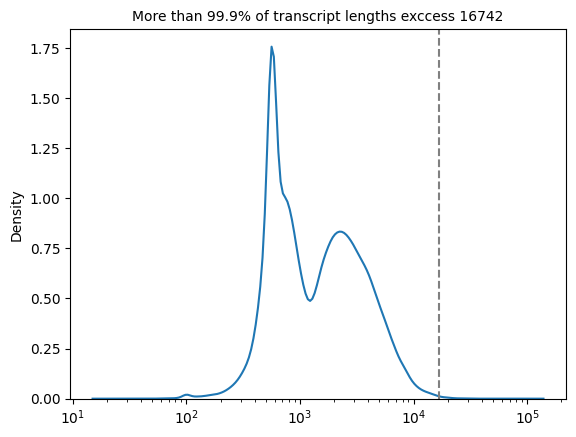

In [38]:
sns.kdeplot(tx_lens, log_scale=True)
plt.axvline(len_most, color="gray", linestyle='--')
plt.title("More than 99.9% of transcript lengths exccess " + str(len_most), fontsize=10)

# ORF candidates

In [2]:
ORF_info_dict_file1 = '/home/user/data3/rbase/translation_pred/models/lib/ORF/candidate_ORFs/candidateORF.60nt.filtered.tx_pos.pkl'
ORF_info_dict_file2 = '/home/user/data3/rbase/translation_pred/models/lib/ORF/candidate_ORFs/candidateORF.60nt.longest.tx_pos.pkl'
with open(ORF_info_dict_file1, 'rb') as f_info:
    ORF_info = pickle.load(f_info)
with open(ORF_info_dict_file2, 'rb') as f_info_l:
    ORF_info_longest = pickle.load(f_info_l)

# Periodicity and RRS of ORF

In [3]:
periodicity_rss_file = '/home/user/data3/rbase/translation_pred/models/lib/ORF/SRR15513148_49_50_51_52.ORF_period_rrs.pkl'
with open(periodicity_rss_file, 'rb') as f:
    period_rss = pickle.load(f)
print(ORF_info_longest["ENST00000574003.1"])
print(period_rss["ENST00000574003.1"])

{'chrom': 'chr17', 'tx_len': 561, 'strand': '+', 'ORFs': [{'id': '1', 'start': 10, 'end': 331, 'orf_type': 'canonical', 'start_codon': 'ATG'}, {'id': '22', 'start': 452, 'end': 530, 'orf_type': 'dORF', 'start_codon': 'ATG'}, {'id': '20', 'start': 375, 'end': 456, 'orf_type': 'dORF', 'start_codon': 'ATG'}, {'id': '24', 'start': 489, 'end': 549, 'orf_type': 'dORF', 'start_codon': 'GTG'}]}
[{'id': '1', 'read_count_ORF': 3381, 'periodicity': 0.6553455591201782, 'RRS': 169.3000030517578}, {'id': '22', 'read_count_ORF': 0, 'periodicity': 1.0, 'RRS': 1.0}, {'id': '20', 'read_count_ORF': 0, 'periodicity': 1.0, 'RRS': 1.0}, {'id': '24', 'read_count_ORF': 0, 'periodicity': 1.0, 'RRS': 1.0}]


## data prepare

In [4]:
records = [
    {'tid': key, **item}
    for key, items in period_rss.items()
    for item in items
]
info_records = [
    {'tid': tid, **item}
    for tid, values in ORF_info_longest.items()
    for item in values["ORFs"]
]
pd_period_rss = pd.DataFrame.from_dict(records)
pd_orf_info = pd.DataFrame.from_dict(info_records)

In [5]:
pd_orf_info_period_rss = pd.merge(pd_period_rss, pd_orf_info, how='left', on=['tid', 'id'])

## plot

In [6]:
pd_orf_info_period_rss_more_10_sampling = pd_orf_info_period_rss[
    pd_orf_info_period_rss["read_count_ORF"] > 10
].sample(50000)

In [17]:
pd_orf_info_period_rss_more_10_sampling["logRRS"] = np.log2(pd_orf_info_period_rss_more_10_sampling["RRS"])
pd_orf_info_period_rss_canonical = pd_orf_info_period_rss_more_10_sampling[
    pd_orf_info_period_rss["orf_type"] == 'canonical'
]
pd_orf_info_period_rss_noncanonical = pd_orf_info_period_rss_more_10_sampling[
    pd_orf_info_period_rss["orf_type"] != 'canonical'
]

/home/user/data2/rbase/envs/anaconda3/envs/ribomodel/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/user/data2/rbase/envs/anaconda3/envs/ribomodel/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_131957/459170195.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd_orf_info_period_rss_canonical = pd_orf_info_period_rss_more_10_sampling[
/tmp/ipykernel_131957/459170195.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd_orf_info_period_rss_noncanonical = pd_orf_info_period_rss_more_10_sampling[


In [ ]:
# plot density
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Density Plot")
ax.set_yscale('log')
sns.jointplot(pd_orf_info_period_rss_noncanonical, 
              x="periodicity", y="RRS", 
              fill=True, kind="kde", space=0)
# plot point
sns.jointplot(pd_orf_info_period_rss_canonical, 
              x="periodicity", y="RRS",
              fill=False, color="red", kind="kde", alpha=0.5)